In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                            summarize, 
                            poly)

In [2]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size = 100)
x2 = 0.5 * x1 + rng.normal(size = 100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size = 100)

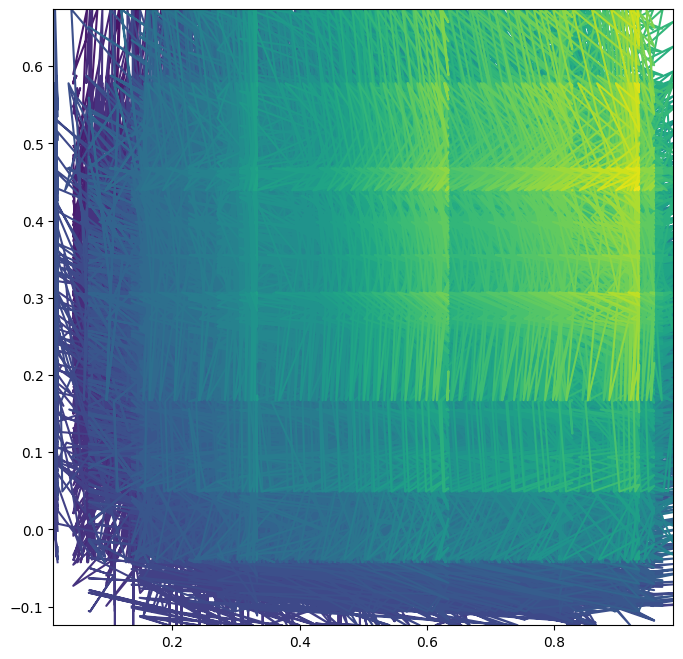

In [3]:
ax = subplots(figsize = (8, 8))[1]
z = np.multiply.outer(x1, x2)
ax.contour(x1, x2, z, levels = 45)

In [4]:
data = pd.DataFrame({
    "y": y, 
    "x1": x1, 
    "x2": x2
})
X = MS(["x1", "x2"]).fit_transform(data)
y = data.y
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


In [5]:
X = MS(["x1"]).fit_transform(data)
y = data.y
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [6]:
X = MS(["x2"]).fit_transform(data)
y = data.y
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


In [7]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
data_new = pd.DataFrame({
    "x1": x1, 
    "x2": x2, 
    "y": y
})

In [8]:
X = MS(["x1", "x2"]).fit_transform(data_new)
y = data_new.y
model1 = sm.OLS(y, X)
X = MS(["x1"]).fit_transform(data_new)
y = data_new.y
model2 = sm.OLS(y, X)
X = MS(["x2"]).fit_transform(data_new)
y = data_new.y
model3 = sm.OLS(y, X)

In [9]:
from utils import *

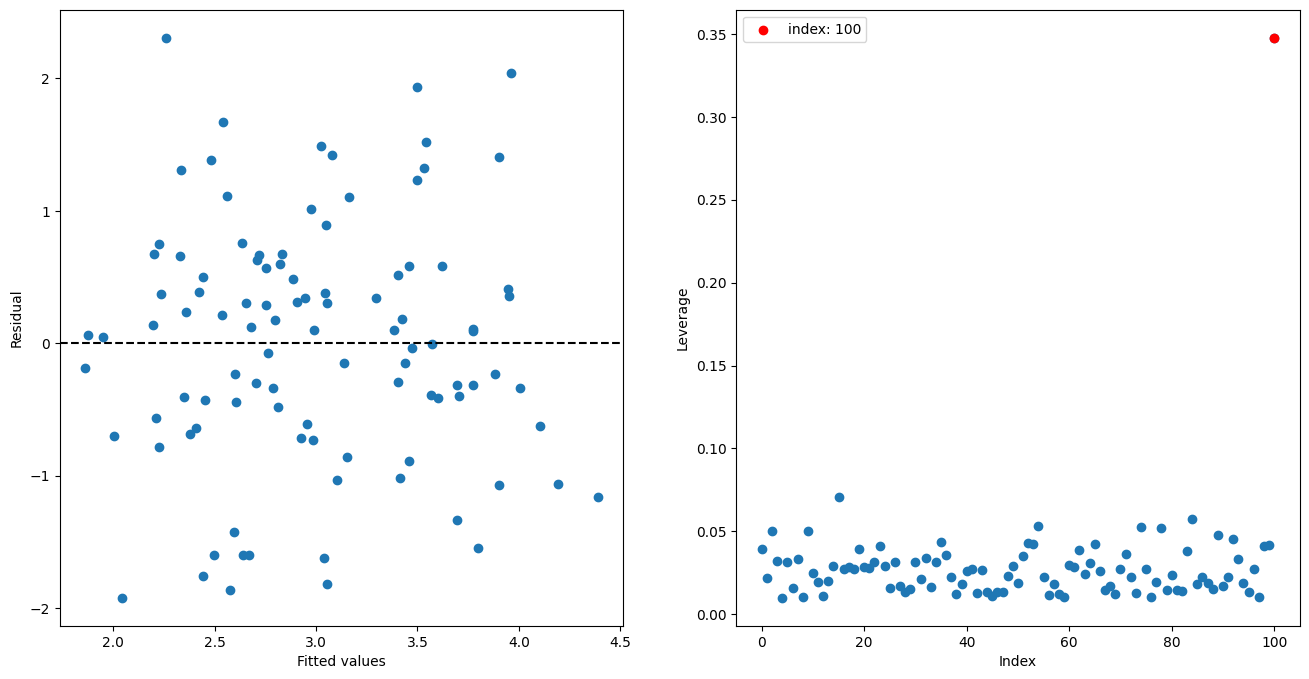

In [10]:
plot_diagnostics(model1.fit())

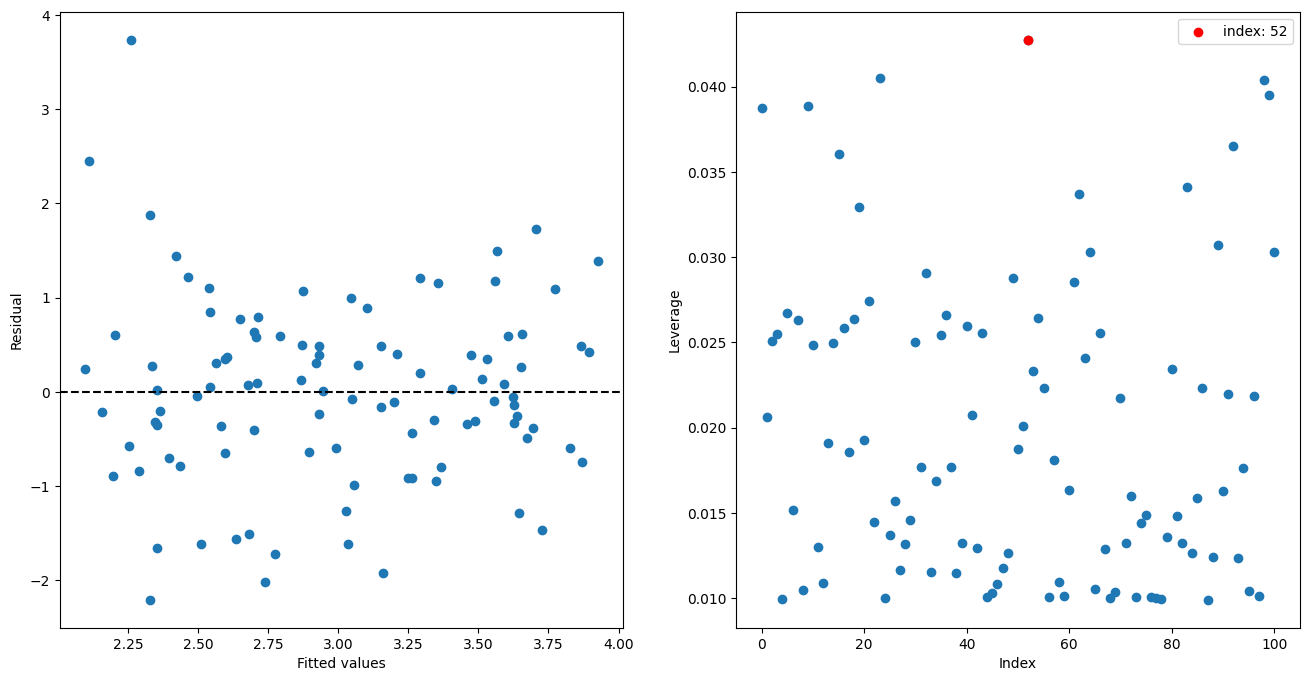

In [11]:
plot_diagnostics(model2.fit())

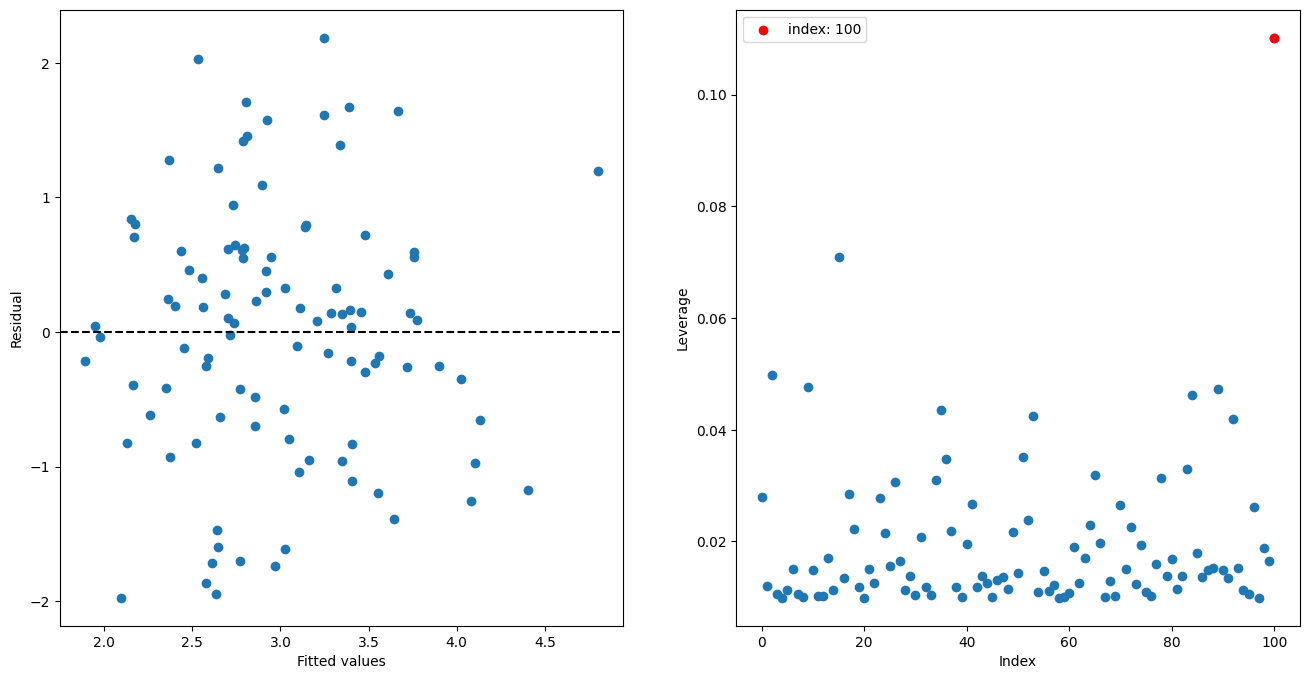

In [12]:
plot_diagnostics(model3.fit())

In [13]:
(x1[100], x2[100], y[100])

(0.1, 0.8, 6.0)